In [157]:
import pandas as pd
import numpy as np
import math

In [158]:
from sklearn.model_selection import KFold, GridSearchCV

## misc function

In [159]:
def train_test_split(X, y, test_p=0.25, random_state=42):
    ids = np.unique(X.index.values)
    test_size = math.floor(test_p * len(ids))
    test_index = np.random.choice(ids, size=test_size)
    X_train = X[~X.index.isin(test_index)]
    X_test = X[X.index.isin(test_index)]
    y_train = y[~y.index.isin(test_index)]
    y_test = y[y.index.isin(test_index)]
    return X_train, X_test, y_train, y_test

In [160]:
data = pd.read_csv('/projects/eerhan_prj/eerhan_prj_results/pog500_expression/results/04_02_250103127/data/All_CISPLATIN.tsv', sep='\t', index_col=0)

In [161]:
data = data.drop_duplicates()

In [162]:
data

,ENSG00000013293,ENSG00000015133,ENSG00000073146,ENSG00000102452,ENSG00000105176,ENSG00000118363,ENSG00000120563,ENSG00000130348,ENSG00000132446,ENSG00000132744,...,ENSG00000275489,ENSG00000275695,ENSG00000277453,ENSG00000277628,ENSG00000279533,ENSG00000279650,ENSG00000283211,y,y_trans,y_pred
pog_id,,,,,,,,,,,,,,,,,,,,,
POG002,-0.071914,0.461393,-0.136231,-0.145099,-0.522286,-1.037833,-0.162236,-1.076076,-0.088944,-0.020637,...,-0.052448,-0.213232,1.777633,-0.113002,-0.175983,-0.239435,-0.041922,57,-0.212033,NaN
POG007,-0.071914,0.175278,0.193592,-0.312930,-0.577048,-1.456191,-0.162236,-0.447868,-0.088944,-0.267441,...,-0.052448,-0.213232,-0.558841,-0.113002,-0.175983,-0.239435,-0.041922,24,-0.933528,False
POG010,-0.071914,-0.403128,-0.007170,-0.344760,-0.223734,1.597143,-0.162236,0.066120,-0.088944,-0.258627,...,-0.052448,-0.213232,1.238447,-0.113002,-0.175983,-0.239435,-0.041922,115,0.482227,NaN
POG014,-0.070985,-0.608966,0.186422,0.890827,-0.382737,2.702711,-0.162236,-0.575873,-0.088944,0.455342,...,-0.052448,-0.213232,-0.558841,-0.113002,1.128562,-0.239435,-0.041922,120,0.527842,NaN
POG019,-0.071914,0.129993,0.623796,-0.205865,-0.030624,-0.535772,-0.162236,-0.810220,-0.088944,-0.361688,...,-0.052448,1.861007,0.699260,-0.113002,-0.175983,13.193450,-0.041922,52,-0.295229,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POG835,-0.071914,1.349242,-0.200762,-0.295568,-0.366405,-0.712050,-0.162236,0.647065,-0.088944,-0.211165,...,-0.052448,-0.213232,-0.259293,-0.113002,-0.175983,-0.239435,-0.041922,124,0.563277,True
POG890,-0.071914,0.341321,-0.136231,-0.324505,1.436916,0.819778,-0.162236,2.535626,-0.088944,-0.294563,...,0.032724,-0.213232,0.040255,-0.113002,-0.175983,-0.239435,-0.041922,112,0.454108,NaN
POG894,-0.071914,-0.020955,0.344163,-0.211652,3.455924,0.347392,-0.162236,-0.392727,-0.088944,-0.340669,...,-0.019689,-0.213232,-0.558841,-0.113002,-0.175983,0.566538,-0.041922,103,0.366060,True


In [103]:
X_columns = data.columns.values[pd.Series(data.columns.values).str.contains('ENSG')]

In [104]:
X = data.loc[:, X_columns]

In [105]:
y = data.loc[:, 'y_trans']
y_discrete = y > 0

In [106]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

## RBF

In [107]:
from sklearn.svm import SVC, SVR

In [108]:
from scipy.stats import spearmanr

In [109]:
print('SVC with linear kernel')
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y_discrete[train_index], y_discrete[test_index]
    svc_rbf = SVC(C=10, kernel='linear', gamma='auto')
    svc_rbf.fit(X_train, y_train)
    print(svc_rbf.score(X_test, y_test))

SVC with linear kernel
0.55
0.5789473684210527
0.6842105263157895
0.6842105263157895
0.6842105263157895


In [169]:
len(svc_rbf.coef_[0])

150

In [ ]:
len()

In [172]:
weights = pd.DataFrame(data={'weights': svc_rbf.coef_[0],
                   'names': data.columns[:-3]})

In [176]:
weights['weights'] = np.abs(weights['weights'])

In [177]:
weights.sort_values('weights')

,weights,names
118,1.240501e-20,ENSG00000258265
8,1.548437e-20,ENSG00000132446
66,2.464286e-20,ENSG00000231461
95,5.049316e-20,ENSG00000249003
68,6.533378e-20,ENSG00000232105
...,...,...
33,1.053354e-01,ENSG00000211640
110,1.237307e-01,ENSG00000254046
16,1.353311e-01,ENSG00000171804
91,1.361842e-01,ENSG00000248268


In [110]:
print('SVR with RBF')
corrs = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    svr_rbf = SVR(C=10, kernel='linear', gamma='auto')
    svr_rbf.fit(X_train, y_train)
    y_pred = svr_rbf.predict(X_test)
    corrs.append(spearmanr(y_pred, y_test))
    print(svr_rbf.score(X_test, y_test))

SVR with RBF
-22.167598469862057
-38.703397851997785
-3.7812489443957347
-17.71115623689262
-3.5282937668743406


In [111]:
[(x.correlation, x.pvalue) for x in corrs]

[(-0.23091389372741347, 0.327329039351679),
 (-0.15107610828700638, 0.5369847774685825),
 (-0.3456140350877193, 0.14724536947686556),
 (0.10246277944916488, 0.6763817785672033),
 (0.4263157894736842, 0.06874301722703564)]

In [112]:
corrs

[SpearmanrResult(correlation=-0.23091389372741347, pvalue=0.327329039351679),
 SpearmanrResult(correlation=-0.15107610828700638, pvalue=0.5369847774685825),
 SpearmanrResult(correlation=-0.3456140350877193, pvalue=0.14724536947686556),
 SpearmanrResult(correlation=0.10246277944916488, pvalue=0.6763817785672033),
 SpearmanrResult(correlation=0.4263157894736842, pvalue=0.06874301722703564)]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [114]:
svc_rbf = SVR(C=10, kernel='linear', gamma='auto')
svc_rbf.fit(X_train, y_train)
svc_rbf.score(X_test, y_test)

-12.868223472093876

In [115]:
params = {"C":[0.1, 1, 10, 50], "gamma": [0.1, 0.01, 0.001, 1, 10]}
grid_search = GridSearchCV(svc_rbf, params,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=10, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50],
                         'gamma': [0.1, 0.01, 0.001, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [116]:
grid_search.score(X_test, y_test)

-6.080950970394378

### PCA/ t-SNE

In [117]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [118]:
pca = PCA(n_components=10)

In [119]:
pca_expression = pca.fit_transform(X)

In [120]:
pca_expression_df = pd.DataFrame(pca_expression, columns=['PC{}'.format(i) for i in range(1, 11)], index=X.index)

In [121]:
pca_expression_df['y_trans'] = data['y_trans']
pca_expression_df['y'] = data['y']
pca_expression_df['discrete'] = [1 if x else 0 for x in y_discrete]

In [154]:
tsne = TSNE(n_components=3, perplexity=50)

In [155]:
tsne_expression = tsne.fit_transform(pca_expression)

In [156]:
tsne_expression_df = pd.DataFrame(tsne_expression, columns=['tsne{}'.format(i) for i in range(1, 4)], index=X.index)

ValueError: Shape of passed values is (96, 3), indices imply (14, 3)

In [ ]:
tsne_expression_df['y_trans'] = data['y_trans']
tsne_expression_df['y'] = data['y']
tsne_expression_df['discrete'] = [1 if x else 0 for x in y_discrete]

## Try to explain with cancer type

In [126]:
from matplotlib import pyplot as plt
import seaborn as sns

In [127]:
drugs_df = pd.read_csv('../data/processed/drugs_filtered.tsv', sep='\t', index_col=0)

In [128]:
cancer_map = drugs_df[['pog_id', 'cancer_cohort']]

In [129]:
data = cancer_map.join(data, on='pog_id', how='right').drop_duplicates().sort_values('pog_id')

In [130]:
data = data.set_index('pog_id')

In [131]:
data

,cancer_cohort,ENSG00000013293,ENSG00000015133,ENSG00000073146,ENSG00000102452,ENSG00000105176,ENSG00000118363,ENSG00000120563,ENSG00000130348,ENSG00000132446,...,ENSG00000275489,ENSG00000275695,ENSG00000277453,ENSG00000277628,ENSG00000279533,ENSG00000279650,ENSG00000283211,y,y_trans,y_pred
pog_id,,,,,,,,,,,,,,,,,,,,,
POG002,BRCA,-0.071914,0.461393,-0.136231,-0.145099,-0.522286,-1.037833,-0.162236,-1.076076,-0.088944,...,-0.052448,-0.213232,1.777633,-0.113002,-0.175983,-0.239435,-0.041922,57,-0.212033,NaN
POG007,HNSC,-0.071914,0.175278,0.193592,-0.312930,-0.577048,-1.456191,-0.162236,-0.447868,-0.088944,...,-0.052448,-0.213232,-0.558841,-0.113002,-0.175983,-0.239435,-0.041922,24,-0.933528,False
POG010,BRCA,-0.071914,-0.403128,-0.007170,-0.344760,-0.223734,1.597143,-0.162236,0.066120,-0.088944,...,-0.052448,-0.213232,1.238447,-0.113002,-0.175983,-0.239435,-0.041922,115,0.482227,NaN
POG014,CHOL,-0.070985,-0.608966,0.186422,0.890827,-0.382737,2.702711,-0.162236,-0.575873,-0.088944,...,-0.052448,-0.213232,-0.558841,-0.113002,1.128562,-0.239435,-0.041922,120,0.527842,NaN
POG019,SECR,-0.071914,0.129993,0.623796,-0.205865,-0.030624,-0.535772,-0.162236,-0.810220,-0.088944,...,-0.052448,1.861007,0.699260,-0.113002,-0.175983,13.193450,-0.041922,52,-0.295229,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POG835,ESCA,-0.071914,1.349242,-0.200762,-0.295568,-0.366405,-0.712050,-0.162236,0.647065,-0.088944,...,-0.052448,-0.213232,-0.259293,-0.113002,-0.175983,-0.239435,-0.041922,124,0.563277,True
POG890,BRCA,-0.071914,0.341321,-0.136231,-0.324505,1.436916,0.819778,-0.162236,2.535626,-0.088944,...,0.032724,-0.213232,0.040255,-0.113002,-0.175983,-0.239435,-0.041922,112,0.454108,NaN
POG894,OV,-0.071914,-0.020955,0.344163,-0.211652,3.455924,0.347392,-0.162236,-0.392727,-0.088944,...,-0.019689,-0.213232,-0.558841,-0.113002,-0.175983,0.566538,-0.041922,103,0.366060,True


In [132]:
data['y_true'] = data['y_trans'] > 0

In [133]:
# data.to_csv('../ismb_poster/gemcitabine.tsv', sep='\t')

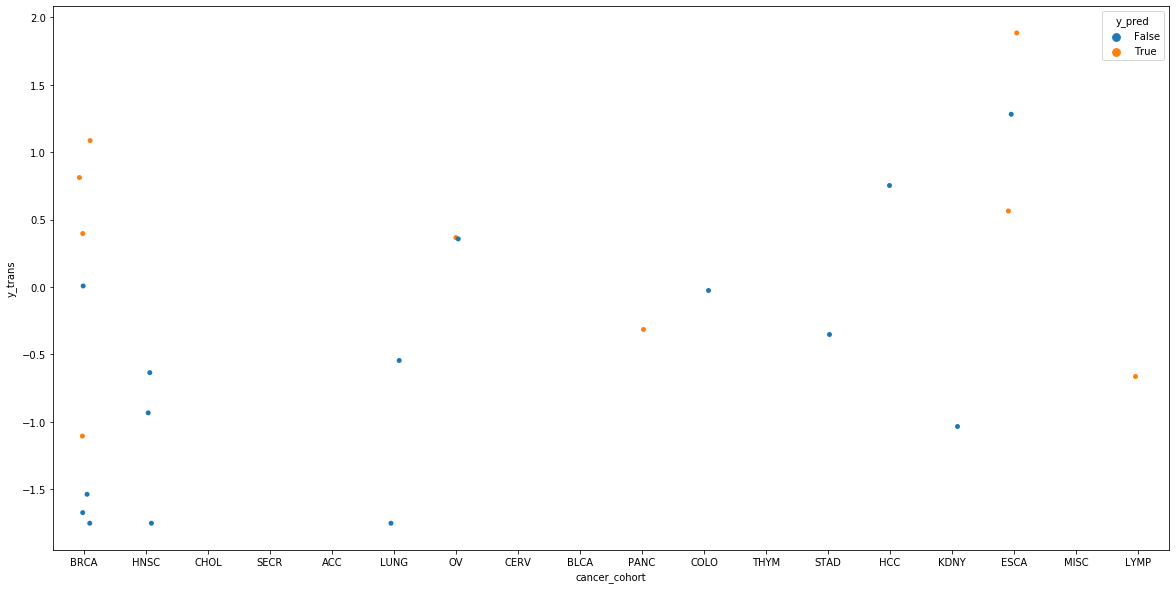

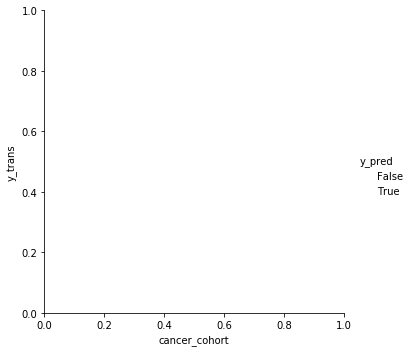

In [134]:
fig, ax = plt.subplots(figsize=(20,10))
sns.catplot(data=data, ax=ax, x='cancer_cohort', y='y_trans', hue='y_pred')

## Try LUNG CISPLATIN


In [135]:
brca_data = data[data['cancer_cohort'] == 'LUNG']

In [136]:
data = brca_data

In [137]:
X_columns = data.columns.values[pd.Series(data.columns.values).str.contains('ENSG')]

In [138]:
X = data.loc[:, X_columns]

In [139]:
y = data.loc[:, 'y_trans']
y_discrete = y > 0

In [140]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

## RBF

In [141]:
from sklearn.svm import SVC, SVR

In [142]:
from scipy.stats import spearmanr

In [143]:
print('SVC with linear kernel')
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y_discrete[train_index], y_discrete[test_index]
    svc_rbf = SVC(C=1, kernel='linear', gamma='auto')
    svc_rbf.fit(X_train, y_train)
    print(svc_rbf.score(X_test, y_test))

SVC with linear kernel
0.0
0.6666666666666666
0.3333333333333333
0.6666666666666666
0.0


In [144]:
print('SVR with linear kernel')
corrs = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    svr_rbf = SVR(C=10, kernel='linear', gamma='auto')
    svr_rbf.fit(X_train, y_train)
    y_pred = svr_rbf.predict(X_test)
    corrs.append(spearmanr(y_pred, y_test))
    print(svr_rbf.score(X_test, y_test))

SVR with linear kernel
-0.7996759128320361
-0.25381218792852644
-34.63971771200522
-0.16941565169454753
-2.5675592010444652


In [145]:
[(x.correlation, x.pvalue) for x in corrs]

[(-0.5, 0.6666666666666667),
 (0.5, 0.6666666666666667),
 (1.0, 0.0),
 (-1.0, 0.0),
 (-0.9999999999999999, nan)]

In [146]:
corrs

[SpearmanrResult(correlation=-0.5, pvalue=0.6666666666666667),
 SpearmanrResult(correlation=0.5, pvalue=0.6666666666666667),
 SpearmanrResult(correlation=1.0, pvalue=0.0),
 SpearmanrResult(correlation=-1.0, pvalue=0.0),
 SpearmanrResult(correlation=-0.9999999999999999, pvalue=nan)]

### Visualize

In [147]:
sns.set(rc={'figure.figsize':(10,10)})

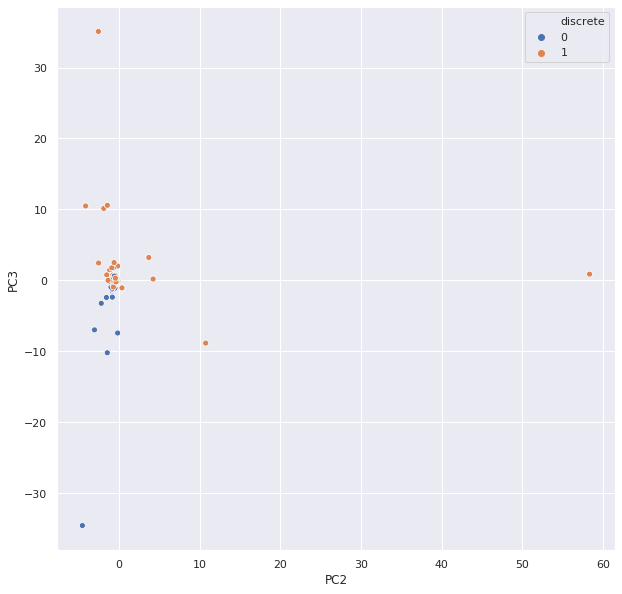

In [148]:
sns.scatterplot(data=pca_expression_df, x='PC2', y='PC3', hue='discrete')
plt.show()

In [149]:
visualize = pca_expression_df.loc[:, ['PC{}'.format(i) for i in range(1, 5)]+['discrete']]

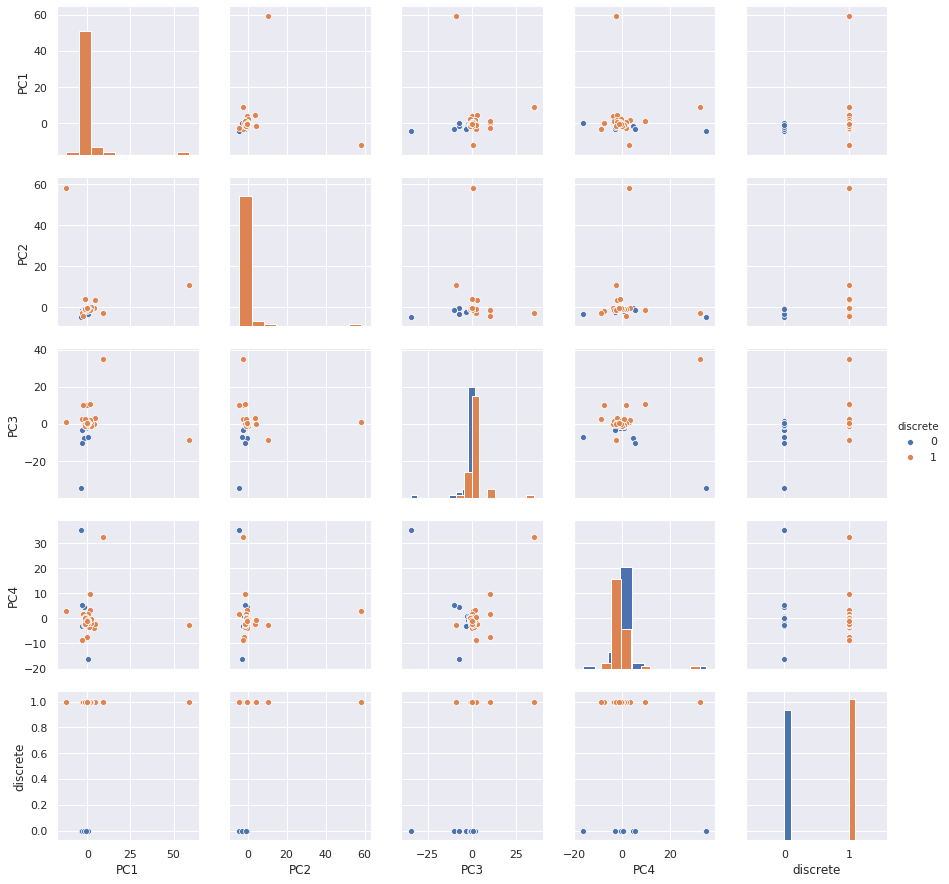

In [151]:
sns.pairplot(visualize, hue='discrete', diag_kind='hist')
plt.show()

In [152]:
pca.explained_variance_ratio_

array([0.06468574, 0.06083885, 0.05176982, 0.04949123, 0.0476475 ,
       0.04644135, 0.04478905, 0.04183908, 0.03924252, 0.03652179])

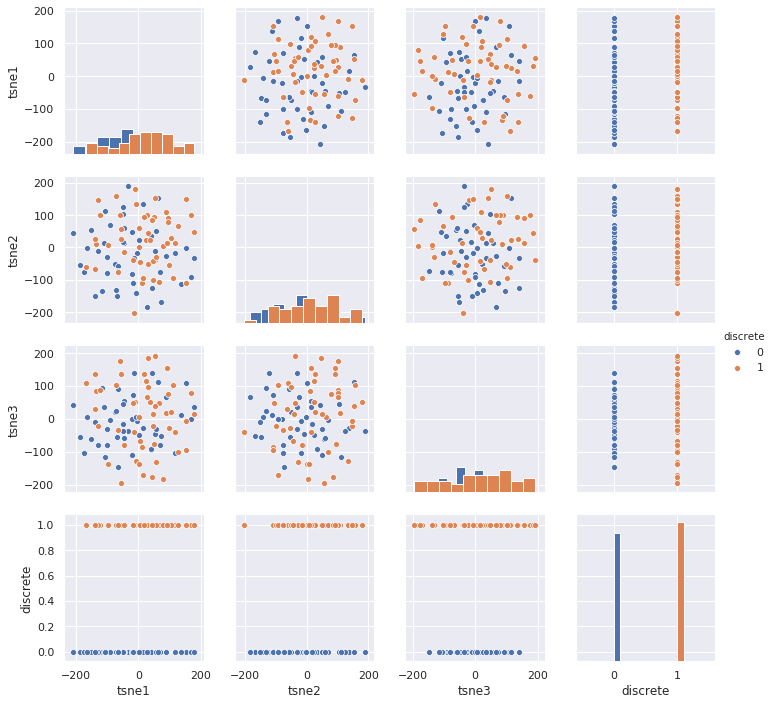

In [153]:
sns.pairplot(tsne_expression_df.loc[:,['tsne{}'.format(i) for i in range(1, 4)]+['discrete']] , hue='discrete', diag_kind='hist')
plt.show()